In [1]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download henrysue/online-shoppers-intention

  0% 0.00/252k [00:00<?, ?B/s]
100% 252k/252k [00:00<00:00, 70.8MB/s]


In [8]:
! unzip online-shoppers-intention

Archive:  online-shoppers-intention.zip
  inflating: online_shoppers_intention.csv  


In [10]:
import pandas as pd
import numpy as np 


In [12]:
df=pd.read_csv("online_shoppers_intention.csv")

In [13]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [14]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [21]:
 df.shape

(12330, 18)

In [22]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [24]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [26]:
x = df.iloc[:,[5,6]]
x

,ProductRelated_Duration,BounceRates
0,0.000000,0.200000
1,64.000000,0.000000
2,0.000000,0.200000
3,2.666667,0.050000
4,627.500000,0.020000
...,...,...
12325,1783.791667,0.007143
12326,465.750000,0.000000
12327,184.250000,0.083333
12328,346.000000,0.000000


In [71]:
x.shape
x = x.values                    #x was in dataframe we converted it into numpy array to make computation easy 

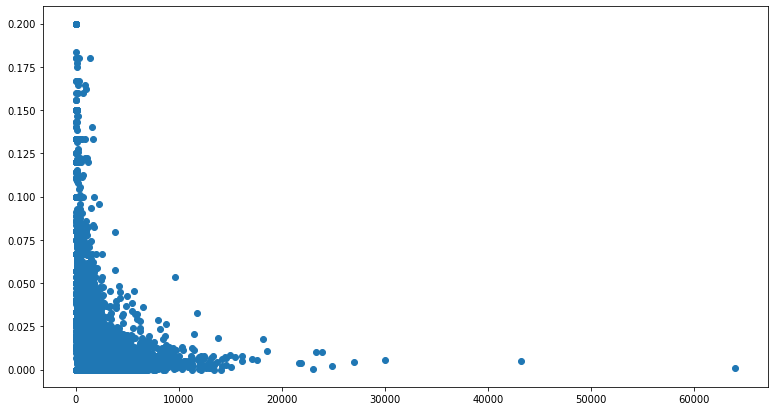

In [72]:
import matplotlib.pyplot as plt
plt.scatter(df['ProductRelated_Duration'],df['BounceRates'])

In [73]:
from sklearn.cluster import KMeans

In [74]:
wcss = []

for i in range(1,11):
  km = KMeans(n_clusters= i,
              init = "k-means++", 
              n_init = 10, 
              max_iter = 300, 
              tol = 0.0001, 
              verbose = 0, 
              random_state= None, 
              copy_x = True, 
              algorithm = "auto")
  km.fit_predict(x)
  labels = km.labels_
  wcss.append(km.inertia_)


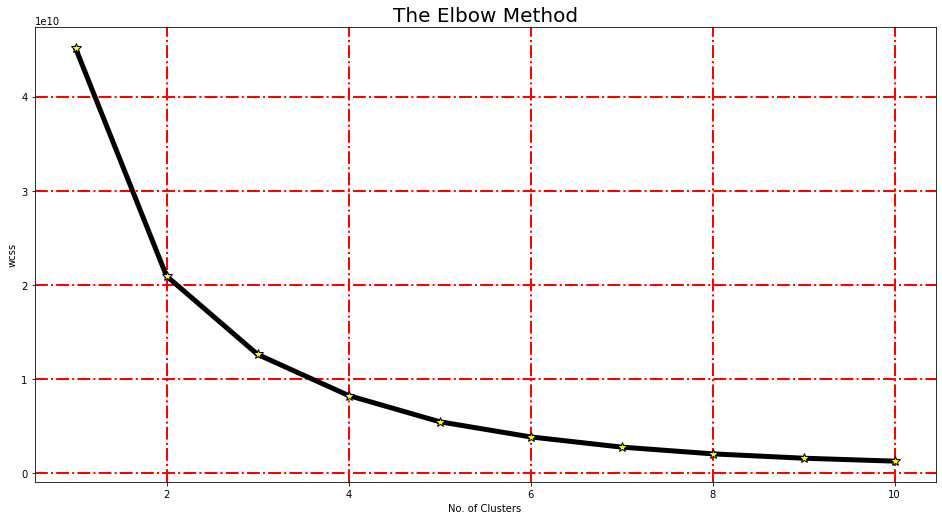

In [75]:
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss,color='black',linestyle='-',marker='*',linewidth=5,markersize=10,markerfacecolor='yellow')
plt.grid('major',axis='both',color='red',linestyle='-.', linewidth=2)
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [76]:
km = KMeans(n_clusters = 2,init = 'k-means++', max_iter = 300, n_init = 10 ,random_state = 0) 
y_means = km.fit_predict(x)

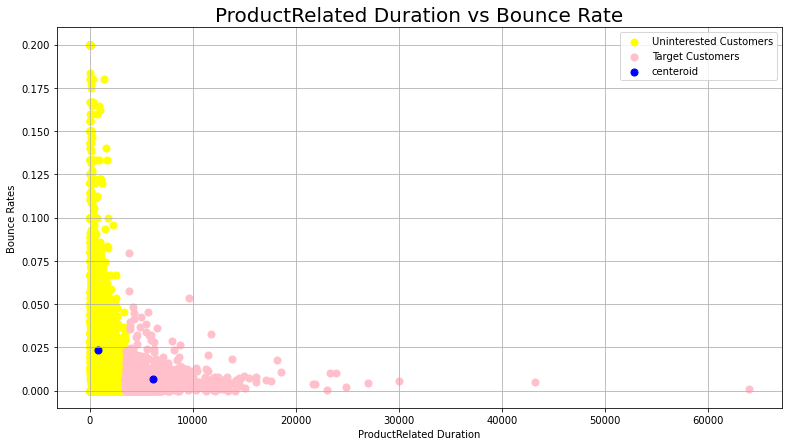

In [77]:
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [85]:
! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Adjusted rand index: 
0.08359442469281096


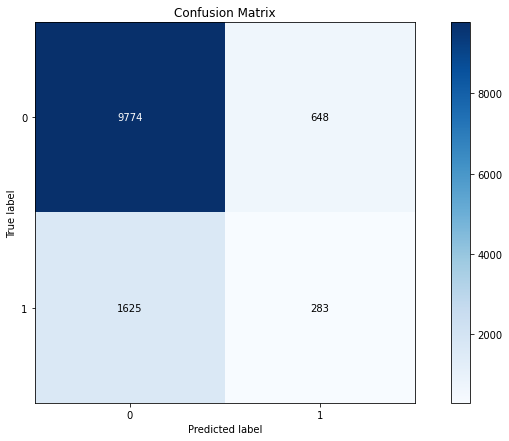

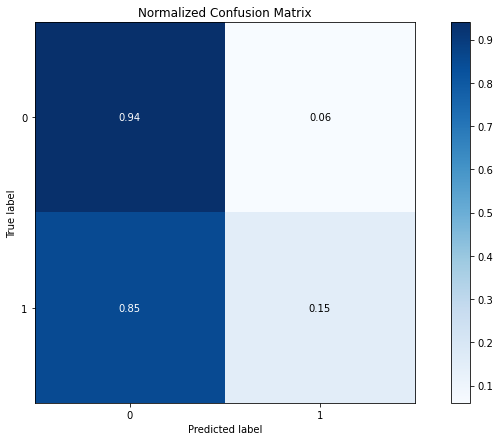

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(df['Revenue'])

labels_pred = y_means

# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)
